In [1]:
import numpy as np
%matplotlib inline     
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from helper_simulation import *
from helper_util import *
import pandas as pd
import os
import pyreadr

pc_alpha=0.005
quantile=1
max_id=get_max("exp_result")
exp_str=""
log_path=f"exp_result/{str(max_id)}.Danbube_river"

logger=get_logger(log_path)
path="Data"

exp_result/185.Danbube_river/xx.log


## load data

In [2]:
datas=dict()
for file in os.listdir(path):
    if file.endswith(".RData"):
        result = pyreadr.read_r(os.path.join(path, file))
        datas.update(result)
river_data=datas["ComTSs"].set_index('Date')

In [3]:

resultsThisPaper,results_tail=method_this_paper(river_data,pc_alpha=pc_alpha,quantile=quantile,tau_max=1)

In [3]:
tranform_frechet_df(river_data).head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31
Date,,,,,,,,,,,,,,,,,,,,,
1960-06-01,0.302068,0.535924,0.564201,0.583984,0.650508,0.623995,0.663411,0.864892,1.013163,1.127287,...,0.288372,0.161789,0.191055,0.162916,0.133650,0.279490,0.231329,0.331115,0.283521,0.260830
1960-06-02,0.359063,0.514355,0.530526,0.468286,0.519248,0.476908,0.510798,0.575462,0.674851,0.883834,...,0.392174,0.130154,0.157454,0.142476,0.136000,0.279872,0.307145,0.352414,0.457223,0.413618
1960-06-03,0.466228,0.430401,0.425542,0.371722,0.327238,0.388452,0.408418,0.642078,0.838151,1.190884,...,0.334592,0.131833,0.157732,0.133780,0.147716,0.281980,0.322124,0.375785,0.578780,0.442222
1960-06-04,0.455500,0.355611,0.380128,0.374825,0.509832,0.488758,0.586606,0.649659,0.735984,0.824057,...,0.404301,0.118743,0.135084,0.127586,0.146905,0.123642,0.320432,0.377710,0.549337,0.444455
1960-06-05,0.433942,0.365581,0.418350,0.390433,0.448108,0.409712,0.498080,1.031547,0.413095,0.588864,...,0.364410,0.126691,0.157315,0.109145,0.100750,0.086819,0.363008,0.352642,0.510476,0.411791


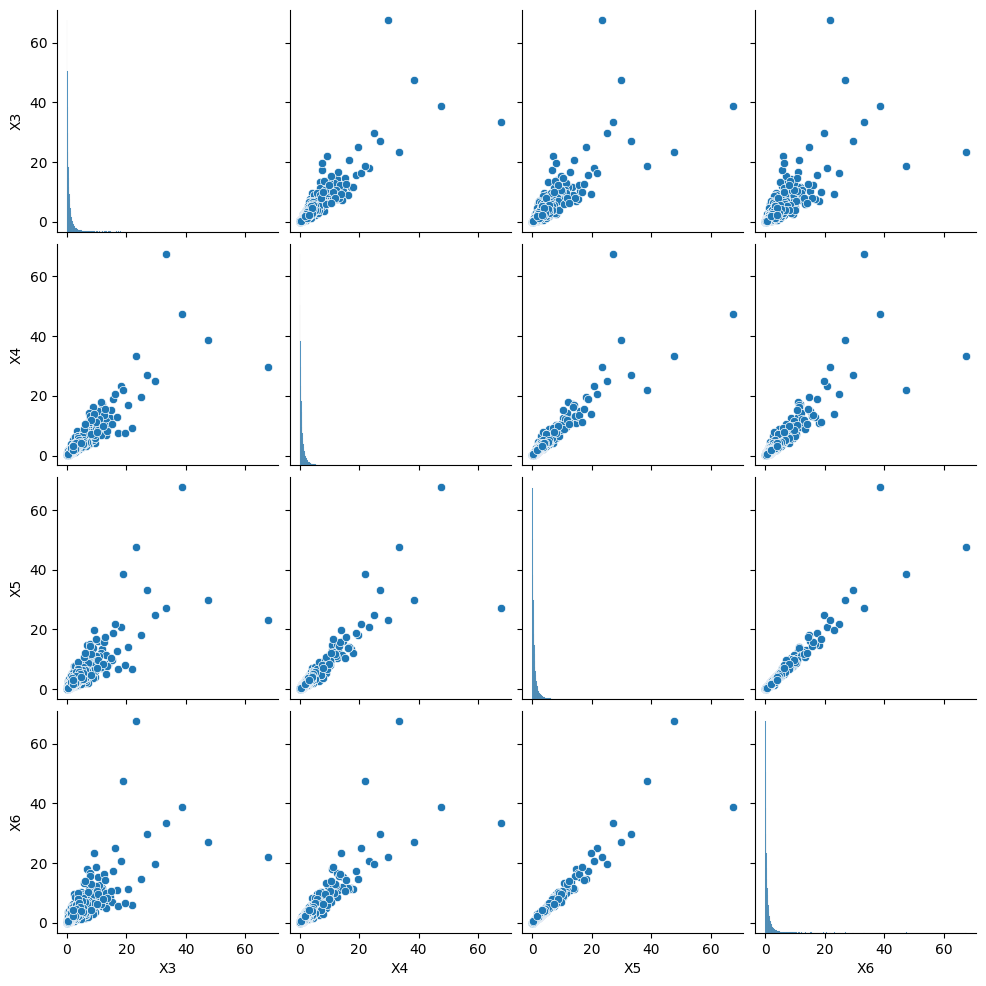

In [11]:
import seaborn as sns
g=sns.pairplot(tranform_frechet_df(river_data[[f"X{i}" for i in range(3,7)]]),corner=False)

this is our results


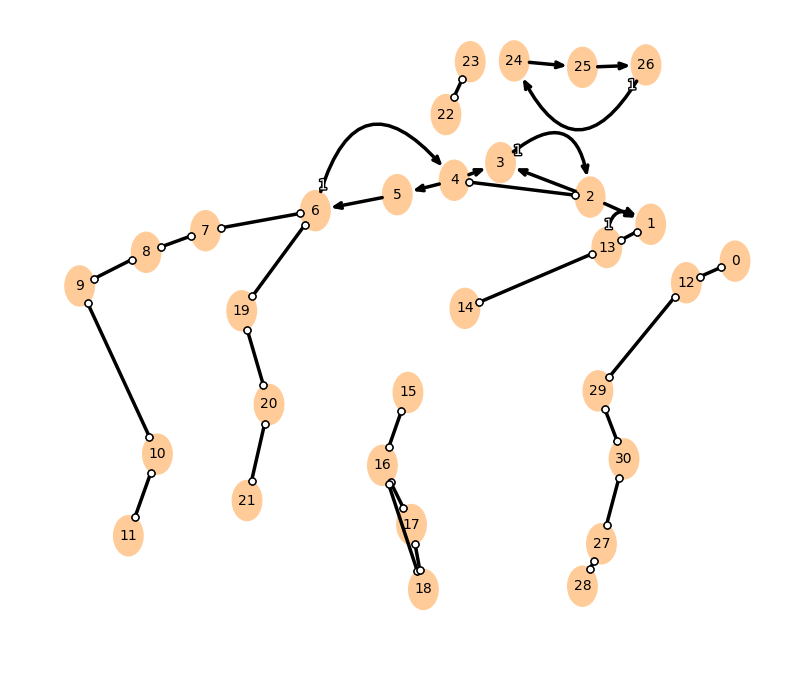

In [4]:
print("this is our results")
draw_graph(resultsThisPaper,node_pos=position_dict,figsize=(10,10),node_size=50,arrow_linewidth=5,arrowhead_size=45,curved_radius=1,label_fontsize=10)

Results in other papers [1,2,3]





[1]: Gong, Y., Zhong, P., Opitz, T., & Huser, R. (2024). Partial tail-correlation coefficient applied to extremal-network learning. *Technometrics*, 1–16. Taylor & Francis.

[2]: Lee, J., & Cooley, D. (2022). Partial Tail Correlation for Extremes. *arXiv preprint arXiv:2210.02048*.

[3]: Engelke, S., & Hitz, A. S. (2020). Graphical models for extremes. *Journal of the Royal Statistical Society Series B: Statistical Methodology, 82*(4), 871–932. Oxford University Press.


By Gong et al. [1]


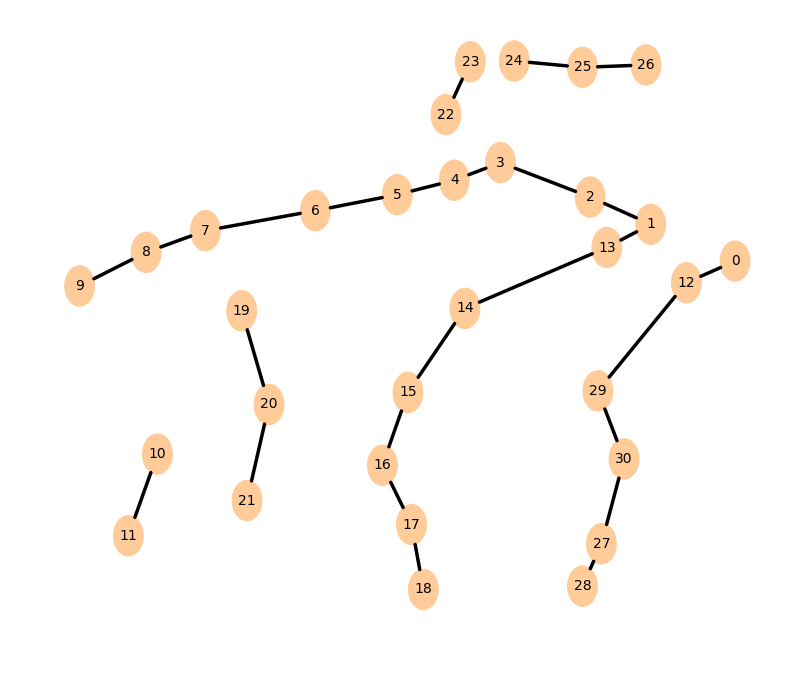

By Cooley and Lee [2]


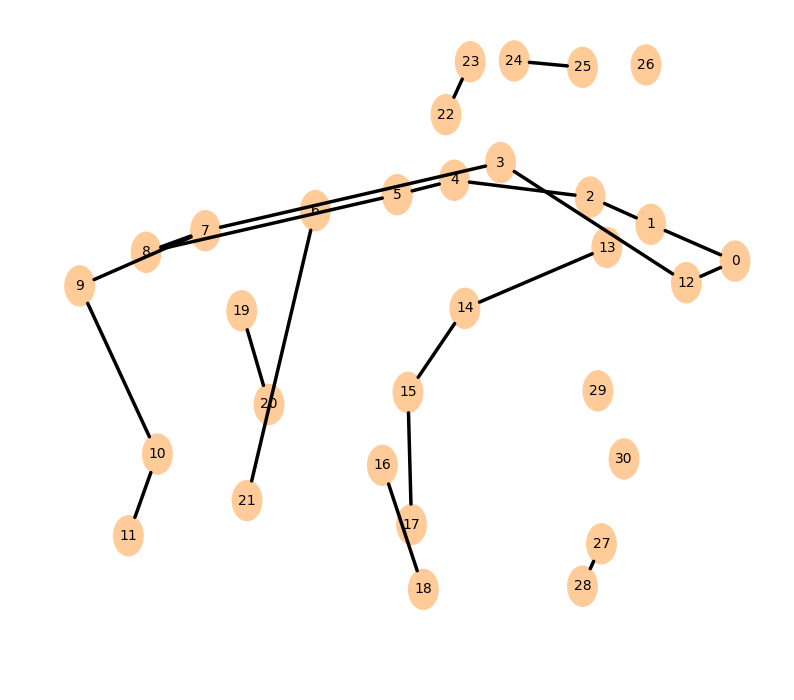

By Engelke and Hitz [3]


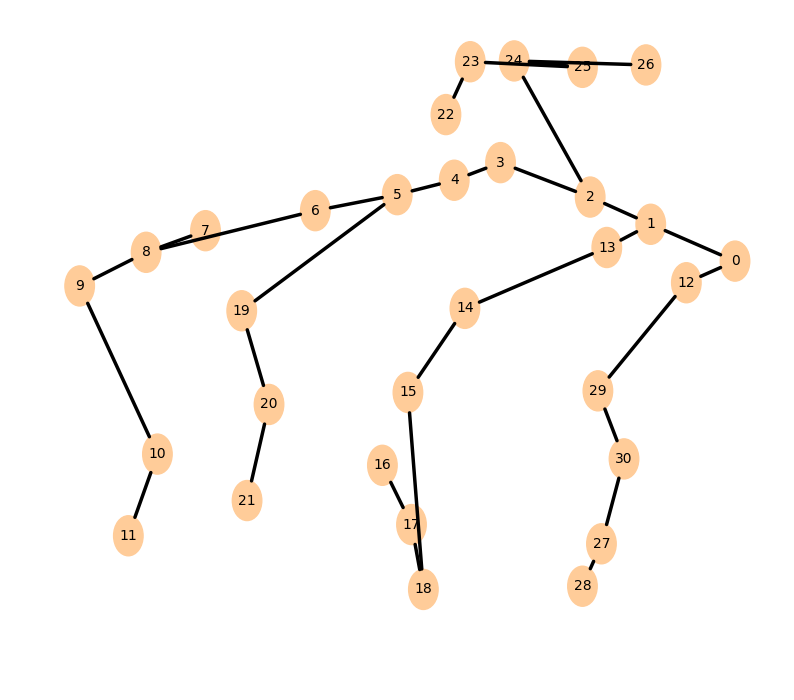

In [6]:
links_gong=[]
links_gong.append((12,11))
links_gong.append((27,26))
links_gong.append((26,25))
links_gong.append((24,23))
links_gong.append((10,9))
links_gong.append((9,8))
links_gong.append((8,7))
links_gong.append((7,6))
links_gong.append((6,5))
links_gong.append((5,4))
links_gong.append((4,3))
links_gong.append((3,2))
links_gong.append((2,14))
links_gong.append((14,15))
links_gong.append((15,16))
links_gong.append((16,17))
links_gong.append((17,18))
links_gong.append((18,19))
links_gong.append((29,28))
links_gong.append((28,31))
links_gong.append((31,30))
links_gong.append((30,13))
links_gong.append((13,1))
links_gong.append((22,21))
links_gong.append((21,20))

edge_shape_gong=np.zeros_like(results_tail["graph"])
for start,end in links_gong:
    edge_shape_gong[start-1,end-1,0]="---"
    edge_shape_gong[end-1,start-1,0]="---"

links_cooley=[]

links_cooley.append((26,25))
links_cooley.append((24,23))
links_cooley.append((12,11))
links_cooley.append((11,10))
links_cooley.append((10,8))
links_cooley.append((8,9))
links_cooley.append((8,4))
links_cooley.append((9,6))
links_cooley.append((6,5))
links_cooley.append((5,3))
links_cooley.append((3,2))
links_cooley.append((2,1))
links_cooley.append((1,13))
links_cooley.append((13,4))
links_cooley.append((22,7))
links_cooley.append((21,20))
links_cooley.append((17,19))
links_cooley.append((16,18))
links_cooley.append((16,15))
links_cooley.append((15,14))
links_cooley.append((29,28))



edge_shape_cooley=np.zeros_like(results_tail["graph"])
for start,end in links_cooley:
    edge_shape_cooley[start-1,end-1,0]="---"
    edge_shape_cooley[end-1,start-1,0]="---"



links_Enge=[]
links_Enge.append((1,2))
links_Enge.append((2,3))
links_Enge.append((3,25))
links_Enge.append((25,27))
links_Enge.append((25,26))
links_Enge.append((26,24))
links_Enge.append((24,23))
links_Enge.append((3,4))
links_Enge.append((4,5))
links_Enge.append((5,6))
links_Enge.append((6,7))
links_Enge.append((7,9))
links_Enge.append((9,8))
links_Enge.append((9,10))
links_Enge.append((10,11))
links_Enge.append((11,12))
links_Enge.append((6,20))
links_Enge.append((20,21))
links_Enge.append((21,22))
links_Enge.append((2,14))
links_Enge.append((14,15))
links_Enge.append((15,16))
links_Enge.append((16,19))
links_Enge.append((19,18))
links_Enge.append((18,17))
links_Enge.append((1,13))
links_Enge.append((13,30))
links_Enge.append((30,31))
links_Enge.append((31,28))
links_Enge.append((28,29))





edge_shape_Enge=np.zeros_like(results_tail["graph"])
for start,end in links_Enge:
    edge_shape_Enge[start-1,end-1,0]="---"
    edge_shape_Enge[end-1,start-1,0]="---"



print("By Gong et al. [1]")

draw_graph(edge_shape_gong,node_pos=position_dict,figsize=(10,10),node_size=50,arrow_linewidth=5,arrowhead_size=45,curved_radius=1)

print("By Cooley and Lee [2]")
draw_graph(edge_shape_cooley,node_pos=position_dict,figsize=(10,10),node_size=50,arrow_linewidth=5,arrowhead_size=45,curved_radius=1)

print("By Engelke and Hitz [3]")
draw_graph(edge_shape_Enge,node_pos=position_dict,figsize=(10,10),node_size=50,arrow_linewidth=5,arrowhead_size=45,curved_radius=1)

